In [1]:
#Importing librarires
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
#Varibale to create new version [for creating new set boolean to True]
create_new_version = True

In [3]:
# Defining variables
image_size= 256
batch_size=32
channels = 3
epochs = 50

In [4]:
#loading the dataset
df=tf.keras.preprocessing.image_dataset_from_directory(
    "Data",
    shuffle=True,
    image_size=(image_size,image_size),
    batch_size=32
)

Found 3200 files belonging to 16 classes.


In [5]:
# Storing class names in a variable
class_names=df.class_names
class_names

['FreshApple',
 'FreshBanana',
 'FreshGrape',
 'FreshGuava',
 'FreshJujube',
 'FreshOrange',
 'FreshPomegranate',
 'FreshStrawberry',
 'RottenApple',
 'RottenBanana',
 'RottenGrape',
 'RottenGuava',
 'RottenJujube',
 'RottenOrange',
 'RottenPomegranate',
 'RottenStrawberry']

In [6]:
#checking lengthof the dataset
len(df)

100

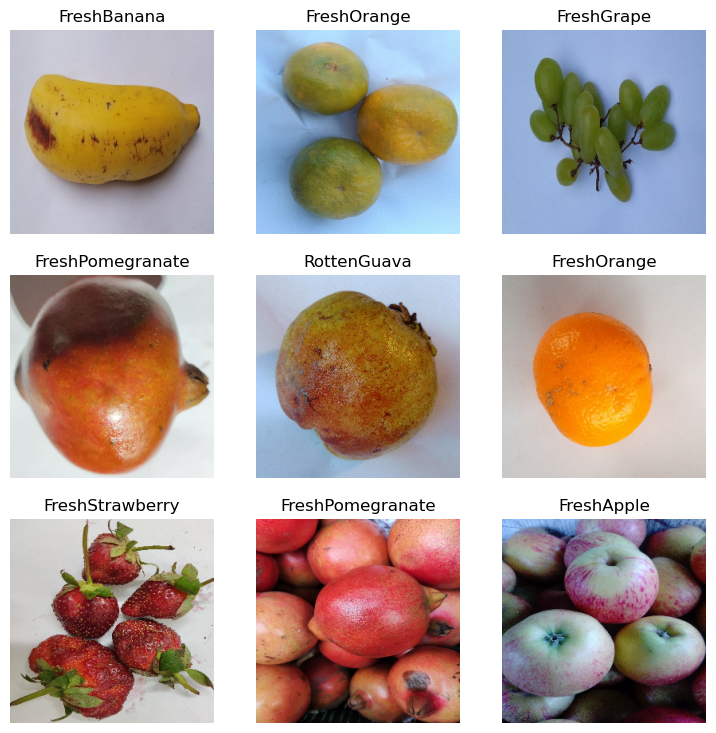

In [13]:
plt.figure(figsize=(9,9))
for image_batch, label_batch in df.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [14]:
# Defining function to split the dataset into train set, validation set and test set
def split_data(data,train_split=0.8,val_split=0.1,shuffle_size=10000,shuffle=True):
    data_size=len(data)
    if shuffle:
        data=data.shuffle(shuffle_size,seed=15)
    
    train_size=int(data_size*train_split)
    train_df=data.take(train_size)
    
    val_size=int(data_size*val_split)
    val_df=data.skip(train_size).take(val_size)
    
    test_size=data_size-(train_size+val_size)
    test_df=data.skip(train_size).skip(val_size)
    
    print("length of the train data, validation data and test data is:",train_size,val_size,test_size)
    
    return train_df,val_df,test_df

In [15]:
# Splitting the dataset into train data, validation data and test data
train_df,val_df,test_df=split_data(df)

length of the train data, validation data and test data is: 80 10 10


In [18]:
train_df

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
# optimizing the data for training
train_df=train_df.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_df=val_df.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_df=test_df.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [11]:
# Scaling the data
resize_and_rescale= tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_size,image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [12]:
# Performing data augmentation
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [13]:
# building the model
input_shape=(batch_size,image_size,image_size,channels)
n_classes = 16
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(16,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(16,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(16,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])

model.build(input_shape=input_shape)

In [14]:
# checking model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 16)          0         
 g2D)                                                 

In [15]:
# compiling the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [16]:
#fitting the model
history=model.fit(
    train_df,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
    validation_data=val_df
)

Epoch 1/50


80/80 [==============================] - 148s 1s/step - loss: 2.3361 - accuracy: 0.2176 - val_loss: 1.8013 - val_accuracy: 0.3906
Epoch 2/50
80/80 [==============================] - 64s 795ms/step - loss: 1.4792 - accuracy: 0.4789 - val_loss: 1.1006 - val_accuracy: 0.6062
Epoch 3/50
80/80 [==============================] - 43s 543ms/step - loss: 1.1106 - accuracy: 0.6043 - val_loss: 0.8606 - val_accuracy: 0.6938
Epoch 4/50
80/80 [==============================] - 38s 478ms/step - loss: 0.9477 - accuracy: 0.6594 - val_loss: 0.7489 - val_accuracy: 0.7563
Epoch 5/50
80/80 [==============================] - 39s 492ms/step - loss: 0.8232 - accuracy: 0.6910 - val_loss: 0.7325 - val_accuracy: 0.7406
Epoch 6/50
80/80 [==============================] - 33s 415ms/step - loss: 0.7939 - accuracy: 0.7137 - val_loss: 0.5919 - val_accuracy: 0.7906
Epoch 7/50
80/80 [==============================] - 34s 422ms/step - loss: 0.7063 - accuracy: 0.7437 - val_loss: 0.6372 - val_accuracy: 0.7656

In [17]:
# Evaluating performance on test data
scores=model.evaluate(test_df)

10/10 [==============================] - 47s 163ms/step - loss: 0.2516 - accuracy: 0.8906


In [18]:
# storing model history parameters in variables
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

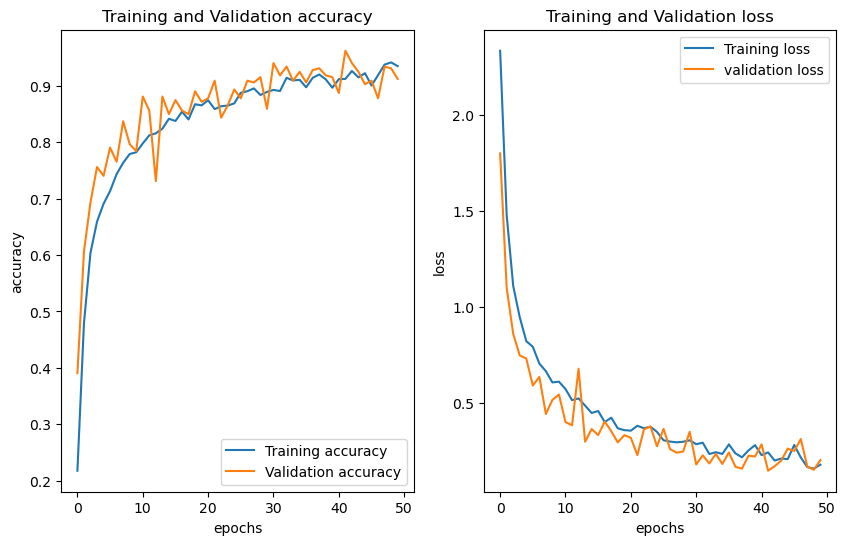

In [19]:
# plotting model performance
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(range(epochs),train_acc,label='Training accuracy')
plt.plot(range(epochs),val_acc,label='Validation accuracy')
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and Validation accuracy')

plt.subplot(1,2,2)
plt.plot(range(epochs),train_loss,label='Training loss')
plt.plot(range(epochs),val_loss,label='validation loss')
plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training and Validation loss')


1/1 [==============================] - 1s 594ms/step


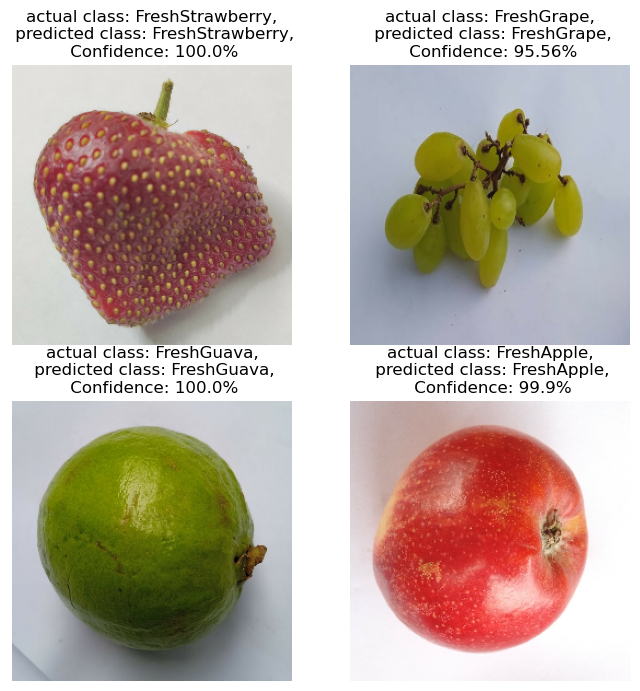

In [20]:
plt.figure(figsize=(8,8))
for images,labels in test_df.take(1):
    batch_prediction=model.predict(images)
    for i in range(4):
        actual_class=class_names[labels[i]]
        predicted_class=class_names[np.argmax(batch_prediction[i])]
        confidence=round(100*np.max(batch_prediction[i]),2)
        ax=plt.subplot(2,2,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(f"actual class: {actual_class},\n predicted class: {predicted_class},\n Confidence: {confidence}%")
        
        

In [23]:
#saving new version of the model
if create_new_version:
    import os
    model_version = max([int(i) for i in os.listdir("../models")]+[0])+1
    model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
